In [18]:
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt
%matplotlib inline
pd.reset_option("all")
conn = sqlite3.connect("factbook.db")

q = "SELECT * FROM sqlite_master WHERE type = 'table';"
pd.read_sql_query(q, conn)

html.border has been deprecated, use display.html.border instead
(currently both are identical)


use_inf_as_null had been deprecated and will be removed in a future version.
Use `use_inf_as_na` instead.



,type,name,tbl_name,rootpage,sql
0,table,sqlite_sequence,sqlite_sequence,3,"CREATE TABLE sqlite_sequence(name,seq)"
1,table,facts,facts,47,"CREATE TABLE ""facts"" (""id"" INTEGER PRIMARY KEY..."


In [19]:
q = "SELECT * FROM facts LIMIT 5"
pd.read_sql_query(q, conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,1,af,Afghanistan,652230,652230,0,32564342,2.32,38.57,13.89,1.51
1,2,al,Albania,28748,27398,1350,3029278,0.30,12.92,6.58,3.30
2,3,ag,Algeria,2381741,2381741,0,39542166,1.84,23.67,4.31,0.92
3,4,an,Andorra,468,468,0,85580,0.12,8.13,6.96,0.00
4,5,ao,Angola,1246700,1246700,0,19625353,2.78,38.78,11.49,0.46


In [20]:
q = "SELECT MIN(population), MAX(population), MIN(population_growth), MAX(population_growth) FROM facts"
pd.read_sql_query(q, conn)

,MIN(population),MAX(population),MIN(population_growth),MAX(population_growth)
0,0,7256490011,0.0,4.02


In [21]:
q = "SELECT * FROM facts WHERE population = 0 OR population = 7256490011"
pd.read_sql_query(q, conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,250,ay,Antarctica,None,280000.0,None,0,NaN,NaN,NaN,None
1,261,xx,World,None,NaN,None,7256490011,1.08,18.6,7.8,None


The minimum population (0) seemed too small and maximum population (+7.2 billion) seemed too large. Looking closely at which countries had these popluations, we see that Antarctica had a population of 0 and the World has a population of 7.2 billion.

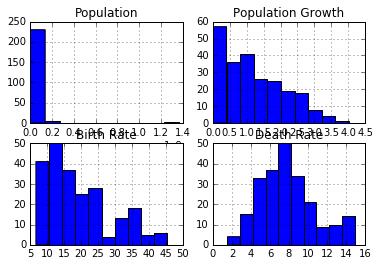

In [22]:
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)
q = "SELECT * FROM facts WHERE id NOT IN (250, 261)"
datas = pd.read_sql_query(q, conn)
datas["population"].hist(ax=ax1)
ax1.set_title("Population")
datas["population_growth"].hist(ax=ax2)
ax2.set_title("Population Growth")
datas["birth_rate"].hist(ax=ax3)
ax3.set_title("Birth Rate")
datas["death_rate"].hist(ax=ax4)
ax4.set_title("Death Rate")

Most countries have populations between 0 and 200 million, with few countries having over 100 million. Population growth is concentrated around 0-2% with frequencies falling lower as rate increases. Birth rates have a high spread, around 5-45 with two modes, around 12% and 35%. Death rates have a narrower spread, 2-15% with a mean of about 8%.

                        name       density
189  Holy See (Vatican City)           inf
204                    Macau  2.116896e+04
116                   Monaco  1.526750e+04
155                Singapore  8.259785e+03
203                Hong Kong  6.655271e+03
249               Gaza Strip  5.191819e+03
232                Gibraltar  4.876333e+03
12                   Bahrain  1.771859e+03
107                 Maldives  1.319641e+03
109                    Malta  1.310016e+03
226                  Bermuda  1.299926e+03
13                Bangladesh  1.297978e+03
217             Sint Maarten  1.167324e+03
233                 Guernsey  8.471795e+02
234                   Jersey  8.387414e+02
195                   Taiwan  7.258254e+02
14                  Barbados  6.758233e+02
112                Mauritius  6.600133e+02
215                    Aruba  6.231222e+02
96                   Lebanon  6.045651e+02


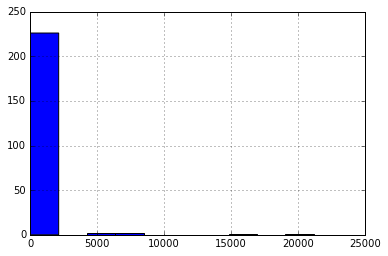

In [23]:
datas["density"] = datas["population"] / datas["area_land"]
print(datas[["name", "density"]].sort_values(by=["density"], ascending=False).head(20))
hist_density = datas[datas["density"] != np.inf]
hist_density["density"].hist()

In [24]:
q = "SELECT name, CAST(area_water as Float) / CAST(area_land as Float) water_land_ratio FROM facts"
ratios = pd.read_sql_query(q, conn)
print(ratios.sort_values(by="water_land_ratio", ascending=False))

                                              name  water_land_ratio
227                 British Indian Ocean Territory        905.666667
246                                 Virgin Islands          4.520231
245                                    Puerto Rico          0.554791
11                                    Bahamas, The          0.386613
70                                   Guinea-Bissau          0.284673
105                                         Malawi          0.259396
124                                    Netherlands          0.225710
181                                         Uganda          0.222922
55                                         Eritrea          0.164356
98                                         Liberia          0.156240
13                                      Bangladesh          0.140509
62                                     Gambia, The          0.116601
195                                         Taiwan          0.115313
59                                

The list is sorted by highest water to land ratios. If the ratio is greater than  1, that means the country has more water area than land area. The Virgin Islands and The British Indian Ocean Territory are the only two such countries.